In [3]:
import music21 as m2
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import collections  as mc


In [4]:
midi_path = '../../../data/MIDI-Freestyle/Freestyle_1008.mid'

In [5]:
mf = m2.midi.MidiFile()
mf.open(midi_path)
mf.read()
mf.close()
   

In [6]:
dir(mf)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_reprInternal',
 'classSet',
 'classes',
 'close',
 'file',
 'format',
 'headerId',
 'isClassOrSubclass',
 'open',
 'openFileLike',
 'read',
 'readstr',
 'ticksPerQuarterNote',
 'ticksPerSecond',
 'tracks',
 'write',
 'writeMThdStr',
 'writestr']

In [7]:
mf.ticksPerQuarterNote, mf.ticksPerSecond, mf.format

(96, None, 0)

In [8]:
dir(mf.tracks[0])

['_DOC_ATTR',
 '_DOC_ORDER',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classListFullyQualifiedCacheDict',
 '_classSetCacheDict',
 '_classTupleCacheDict',
 '_reprInternal',
 'classSet',
 'classes',
 'data',
 'events',
 'getBytes',
 'getChannels',
 'getProgramChanges',
 'hasNotes',
 'headerId',
 'index',
 'isClassOrSubclass',
 'length',
 'processDataToEvents',
 'read',
 'setChannel',
 'updateEvents']

In [9]:
mf.tracks[1].events

IndexError: list index out of range

In [10]:
ev = mf.tracks[0].events


In [11]:
df = pd.DataFrame(data=[e.__dict__ for e in ev])
df.insert(2,'type_str',df.type.map(lambda t: str(t).split('.')[-1]))
df.insert(4,'time_abs',df.time.cumsum())
df

,track,type,type_str,time,time_abs,channel,parameter1,parameter2,centShift,correspondingEvent,lastStatusByte
0,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
1,<music21.midi.MidiTrack 0 -- 9584 events>,MetaEvents.SEQUENCE_TRACK_NAME,SEQUENCE_TRACK_NAME,0,0,NaN,b'8 2-Marimba1 Classic\x00',NaN,None,None,255.0
2,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
3,<music21.midi.MidiTrack 0 -- 9584 events>,MetaEvents.TIME_SIGNATURE,TIME_SIGNATURE,0,0,NaN,b'\x04\x02$\x08',NaN,None,None,255.0
4,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,0,NaN,None,NaN,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9579,<music21.midi.MidiTrack 0 -- 9584 events>,ChannelVoiceMessages.NOTE_ON,NOTE_ON,0,33007,1.0,48,35.0,None,None,144.0
9580,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,12,33019,NaN,None,NaN,None,None,NaN
9581,<music21.midi.MidiTrack 0 -- 9584 events>,ChannelVoiceMessages.NOTE_OFF,NOTE_OFF,0,33019,1.0,48,64.0,None,None,128.0
9582,<music21.midi.MidiTrack 0 -- 9584 events>,DeltaTime,DeltaTime,0,33019,NaN,None,NaN,None,None,NaN


In [12]:
all_events = {}
open_events = {}
for row in df[df.type_str.isin(['NOTE_ON','NOTE_OFF'])].itertuples():
    if row.type_str=='NOTE_ON':
        open_events[row.parameter1]=row.time_abs
    else:
        all_events[row.parameter1]=all_events.get(row.parameter1,[])+[(open_events[row.parameter1], row.time_abs)]


all_events;
    

In [17]:
all_events[48][-3:], all_events[45][-3:], all_events[43][-3:],  

([(32980, 32993), (33000, 33007), (33007, 33019)],
 [(32837, 32849), (32862, 32875), (32922, 32934)],
 [(32838, 32851), (32857, 32870), (32920, 32932)])

In [35]:
event_queue = []
counters = [0]*3

keys = list(all_events.keys())
values = [[v[0] for v in val] for val in all_events.values()]

active = 3

lens = [len(v) for v in values]
while active:
    next_event_key = np.argmin([v[i] if i<len(v) else np.inf for v,i in zip(values,counters)])
    rec = (values[next_event_key][counters[next_event_key]],keys[next_event_key],counters.copy()) 
    print(counters,next_event_key,[v[i] for v,i in zip(values,counters)], rec)
    counters[next_event_key] += 1
    event_queue.append(rec)
    
    #print(' 1'[counters[next_event_key]==lens[next_event_key]],end='')
    active -= (counters[next_event_key]==lens[next_event_key])
    #if counters.max()==10: break

[0, 0, 0] 0 [458, 481, 581] (458, 45, [0, 0, 0])
[1, 0, 0] 1 [506, 481, 581] (481, 48, [1, 0, 0])
[1, 1, 0] 0 [506, 565, 581] (506, 45, [1, 1, 0])
[2, 1, 0] 0 [555, 565, 581] (555, 45, [2, 1, 0])
[3, 1, 0] 1 [601, 565, 581] (565, 48, [3, 1, 0])
[3, 2, 0] 1 [601, 573, 581] (573, 48, [3, 2, 0])
[3, 3, 0] 2 [601, 641, 581] (581, 43, [3, 3, 0])
[3, 3, 1] 0 [601, 641, 656] (601, 45, [3, 3, 1])
[4, 3, 1] 1 [646, 641, 656] (641, 48, [4, 3, 1])
[4, 4, 1] 0 [646, 686, 656] (646, 45, [4, 4, 1])
[5, 4, 1] 2 [734, 686, 656] (656, 43, [5, 4, 1])
[5, 4, 2] 1 [734, 686, 690] (686, 48, [5, 4, 2])
[5, 5, 2] 2 [734, 734, 690] (690, 43, [5, 5, 2])
[5, 5, 3] 2 [734, 734, 732] (732, 43, [5, 5, 3])
[5, 5, 4] 0 [734, 734, 773] (734, 45, [5, 5, 4])
[6, 5, 4] 1 [736, 734, 773] (734, 48, [6, 5, 4])
[6, 6, 4] 0 [736, 821, 773] (736, 45, [6, 6, 4])
[7, 6, 4] 2 [822, 821, 773] (773, 43, [7, 6, 4])
[7, 6, 5] 1 [822, 821, 822] (821, 48, [7, 6, 5])
[7, 7, 5] 0 [822, 865, 822] (822, 45, [7, 7, 5])
[8, 7, 5] 2 [861, 86

[296, 300, 254] 1 [13040, 12987, 12996] (12987, 48, [296, 300, 254])
[296, 301, 254] 2 [13040, 13035, 12996] (12996, 43, [296, 301, 254])
[296, 301, 255] 1 [13040, 13035, 13091] (13035, 48, [296, 301, 255])
[296, 302, 255] 0 [13040, 13081, 13091] (13040, 45, [296, 302, 255])
[297, 302, 255] 1 [13130, 13081, 13091] (13081, 48, [297, 302, 255])
[297, 303, 255] 2 [13130, 13128, 13091] (13091, 43, [297, 303, 255])
[297, 303, 256] 1 [13130, 13128, 13182] (13128, 48, [297, 303, 256])
[297, 304, 256] 0 [13130, 13175, 13182] (13130, 45, [297, 304, 256])
[298, 304, 256] 1 [13245, 13175, 13182] (13175, 48, [298, 304, 256])
[298, 305, 256] 2 [13245, 13457, 13182] (13182, 43, [298, 305, 256])
[298, 305, 257] 0 [13245, 13457, 13304] (13245, 45, [298, 305, 257])
[299, 305, 257] 2 [13351, 13457, 13304] (13304, 43, [299, 305, 257])
[299, 305, 258] 0 [13351, 13457, 13410] (13351, 45, [299, 305, 258])
[300, 305, 258] 2 [13453, 13457, 13410] (13410, 43, [300, 305, 258])
[300, 305, 259] 0 [13453, 13457, 1

[566, 567, 520] 2 [28672, 28807, 28671] (28671, 43, [566, 567, 520])
[566, 567, 521] 0 [28672, 28807, 28709] (28672, 45, [566, 567, 521])
[567, 567, 521] 2 [28756, 28807, 28709] (28709, 43, [567, 567, 521])
[567, 567, 522] 0 [28756, 28807, 28761] (28756, 45, [567, 567, 522])
[568, 567, 522] 2 [28849, 28807, 28761] (28761, 43, [568, 567, 522])
[568, 567, 523] 2 [28849, 28807, 28797] (28797, 43, [568, 567, 523])
[568, 567, 524] 1 [28849, 28807, 28845] (28807, 48, [568, 567, 524])
[568, 568, 524] 1 [28849, 28844, 28845] (28844, 48, [568, 568, 524])
[568, 569, 524] 2 [28849, 28885, 28845] (28845, 43, [568, 569, 524])
[568, 569, 525] 0 [28849, 28885, 28884] (28849, 45, [568, 569, 525])
[569, 569, 525] 2 [28935, 28885, 28884] (28884, 43, [569, 569, 525])
[569, 569, 526] 1 [28935, 28885, 28932] (28885, 48, [569, 569, 526])
[569, 570, 526] 1 [28935, 28928, 28932] (28928, 48, [569, 570, 526])
[569, 571, 526] 2 [28935, 28933, 28932] (28932, 43, [569, 571, 526])
[569, 571, 527] 1 [28935, 28933, 2

IndexError: list index out of range

In [37]:
x= [x[0] for x in event_queue]
y = np.vstack([x[2] for x in event_queue])
y

array([[  0,   0,   0],
       [  1,   0,   0],
       [  1,   1,   0],
       ...,
       [712, 806, 691],
       [712, 807, 691],
       [712, 807, 692]])

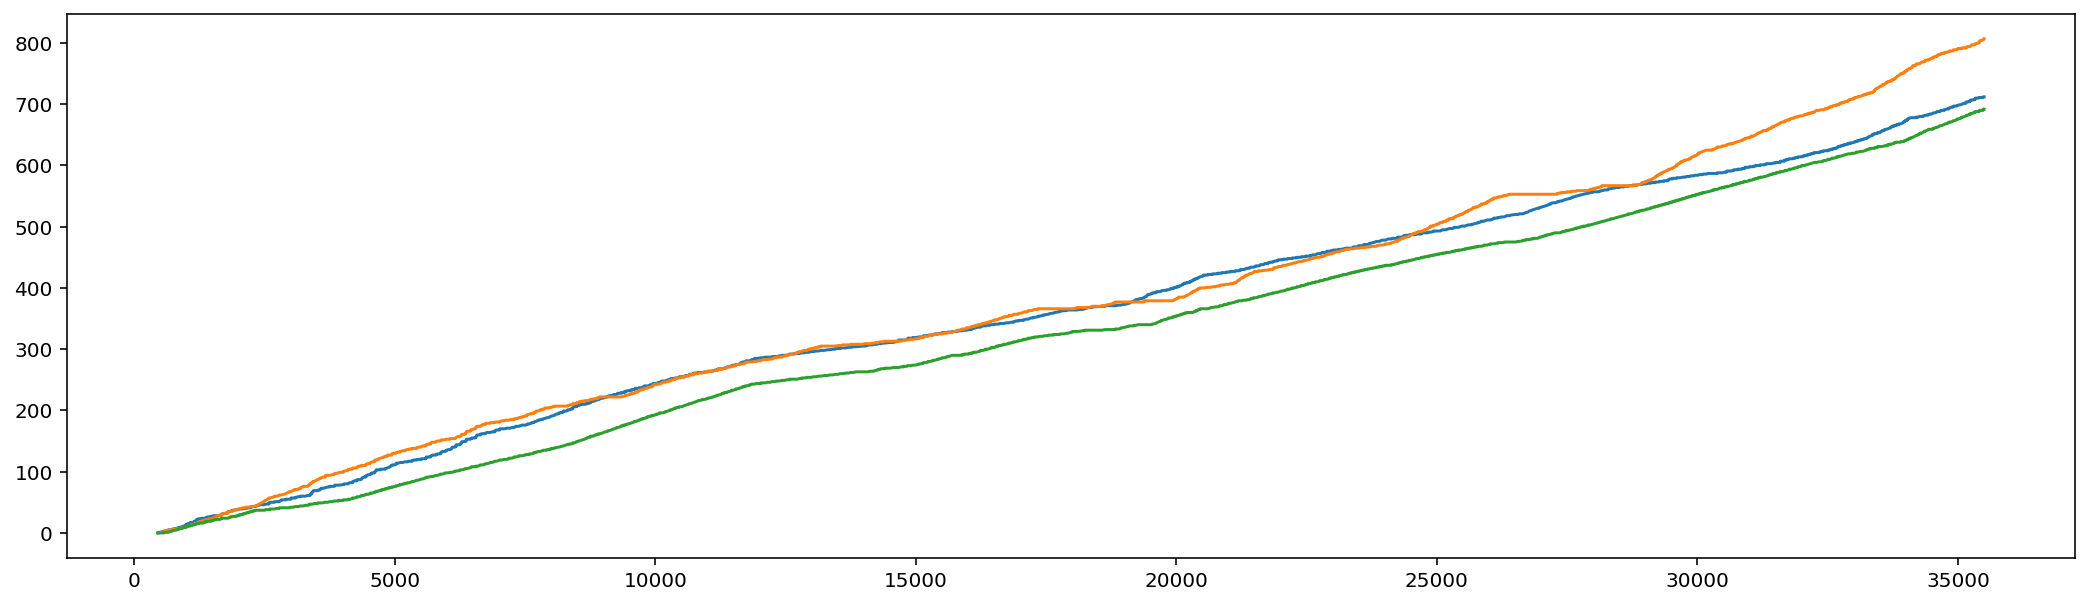

In [38]:
plt.figure(figsize=(18,5))
plt.plot(x,y)


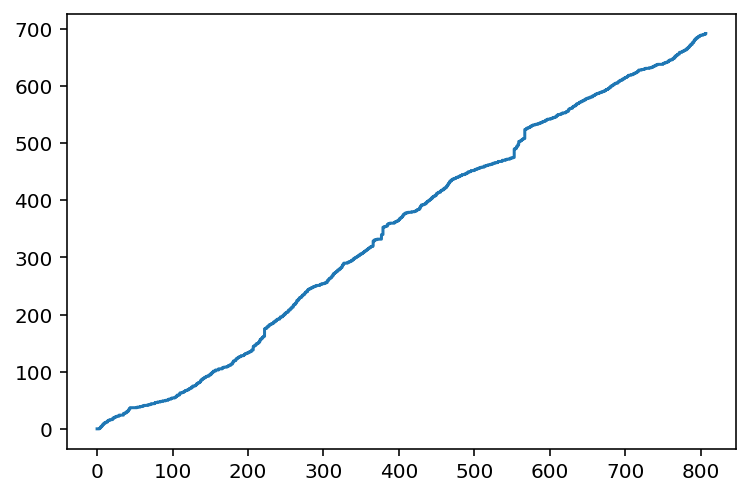

In [39]:
plt.plot(y[:,1],y[:,2])

In [28]:
np.all(np.logical_or(np.diff(y.T)==0,  np.diff(y.T)==1))

True

In [29]:
lens

[662, 638, 473]

In [ ]:
np.all(np.diff(x)>=0)

In [ ]:
plt.plot(x)

In [ ]:
np.diff(values[2])